In [222]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import math

In [251]:
initializer = tf.keras.initializers.glorot_normal()


encoder_input = tf.keras.Input(shape=(1))
x = layers.Dense(24, activation="relu", kernel_initializer=initializer)(encoder_input)
x = layers.Dense(24, activation="relu",kernel_initializer=initializer)(x)
#x = layers.Dense(24, activation="softplus",kernel_initializer=initializer)(x)
#x = layers.Dense(24, activation="softplus",kernel_initializer=initializer)(x)
#x = layers.Dense(16, activation="tanh",kernel_initializer=initializer)(x)
encoder_output = layers.Dense(1)(x)

In [252]:
model = tf.keras.Model(encoder_input, encoder_output, name="encoder")
model.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_157 (Dense)            (None, 24)                48        
_________________________________________________________________
dense_158 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 25        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [262]:
def bounday_fct(x):
    return np.sin(x*(np.pi))
N=100
#model.load_weights('checkpoints/lap_energy.h5')
#model = tf.keras.models.load_model('checkpoints/lap_variational_almost.h5')
x_len = np.linspace(0,1,N).reshape((N,1))
#x_len = tf.convert_to_tensor(x_len)
#model_loss = pde_fluct
x_tensor = tf.convert_to_tensor(x_len, dtype=tf.float32)



start = 1

for step in range(0,65000):

# Open a GradientTape to record the operations run
# during the forward pass, which enables auto-differentiation.
    with tf.GradientTape(persistent=True) as tape:

        # Create tensor that you will watch
        # f = -1
        tape.watch(x_tensor)
        # Feed forward
        output = model(x_tensor, training=True)*bounday_fct(x_tensor)
        y_x = tape.gradient(output,x_tensor)
        #y_xx = tape.gradient(y_x,x_tensor)

        # Gradient and the corresponding loss function
        #o_x = tape.gradient(output, x_tensor)
        loss_direct = (tf.reduce_mean(input_tensor=(0.5*y_x**2 + output)**2)
                      #+ 100*tf.square(y_x[0]-1)
                      + 0*tf.square(output[0])
                      #+ 100*tf.square(output[0]-output[-1])
                      )
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00095)
    if True:
        #print('strasight train')
        mode ='direct'
        #print(loss_direct)
        grads_d = tape.gradient(loss_direct, model.trainable_weights)
        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads_d, model.trainable_weights))
    else:
        print()

    best_loss = 100
    # Log every 200 batches
    if step % 20 == 0:
        print(
            "Training loss in "+ mode + "  step:",
            step, float(loss_direct)
        )
        if best_loss < float(loss_value):
            model.save_weights('checkpoints/lap_energy_best.h5')
            best_loss = float(loss_value)

            #plt.plot(x_len, model(x_len))
            #plt.plot(x_len, np.exp(x_len))

Training loss in direct  step: 0 0.000585808593314141
Training loss in direct  step: 20 0.0005757245235145092
Training loss in direct  step: 40 0.0005662681651301682
Training loss in direct  step: 60 0.0005573764210566878
Training loss in direct  step: 80 0.000549007672816515
Training loss in direct  step: 100 0.0005411249585449696
Training loss in direct  step: 120 0.0005336840986274183
Training loss in direct  step: 140 0.0005266641965135932
Training loss in direct  step: 160 0.0005200371379032731
Training loss in direct  step: 180 0.0005138098495081067
Training loss in direct  step: 200 0.0005079369875602424
Training loss in direct  step: 220 0.0005023924168199301
Training loss in direct  step: 240 0.0004971402231603861
Training loss in direct  step: 260 0.0004921674262732267
Training loss in direct  step: 280 0.0004874651203863323
Training loss in direct  step: 300 0.00048301712376996875
Training loss in direct  step: 320 0.00047879695193842053
Training loss in direct  step: 340 0.

KeyboardInterrupt: 

In [265]:
model.summary()
model.save('checkpoints/quad_pinn_relu_sine_bound.h5')

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_157 (Dense)            (None, 24)                48        
_________________________________________________________________
dense_158 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 25        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


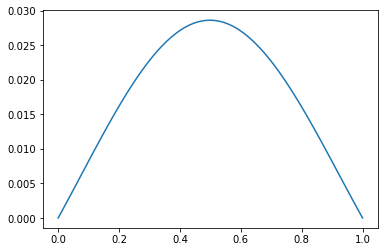

In [263]:
def sol(x):
    return (-x**2+x)
#print(model(x_len))
x_len = np.linspace(0,1,N).reshape((N,1))
plt.plot(x_len, model(x_len)*bounday_fct(x_len))

#plt.plot(x_len,sol(x_len))
#plt.plot(x_len, np.sin(x_len))

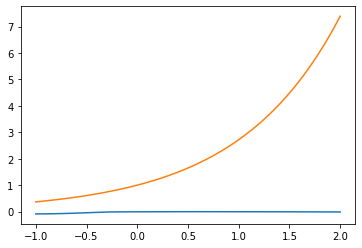

In [16]:
x_len = np.linspace(-1,2,1000).reshape((1000,1))
plt.plot(x_len, model(x_len))
plt.plot(x_len, np.exp(x_len))
